In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
current_dir = os.getcwd()
results = pd.read_csv(current_dir + '/MISA/results/mosei_MISA_confidNet_mse_epoch(10)_test_results_process_all_zero_version.csv')

In [3]:
'''confidNet results
labels: ['happiness', 'sadness', 'anger', 'fear', 'disgust', 'surprise']
'''
results.head()

,id,input_text,emo_label,predict,confid_loss,target_tcp,tcp_TVA,tcp_VA,tcp_TA,tcp_TV,tcp_T,tcp_V,tcp_A
0,-6rXp3zJ3kc[1],very aware of many people are not until they g...,[0. 1. 0. 0. 0. 0.],[0.55662537 0.38589606 0.3532847 0.32799417 0...,0.018769,0.385896,0.488404,2.919198e-05,0.869056,0.067573,0.999999,8.200477e-01,0.518814
1,-AUZQgSxyPQ[0],the perfect soul mate to the spot therapy brus...,[0. 0. 0. 0. 0. 1.],[0.7481889 0.23310995 0.18807708 0.17202565 0...,0.018769,0.256660,0.536308,9.929590e-06,0.844251,0.323447,1.000000,3.224656e-02,0.995602
2,-6rXp3zJ3kc[2],so the answer to the question can i contribute...,[0. 1. 0. 0. 0. 0.],[0.5145242 0.36878633 0.3164015 0.21287923 0...,0.018769,0.368786,0.509062,2.352007e-05,0.661859,0.085916,1.000000,3.573786e-02,0.886478
3,-MeTTeMJBNc[3],picture maybe you could find a picture of the ...,[1. 0. 0. 1. 0. 0.],[0.58545935 0.32975513 0.27381423 0.2885348 0...,0.018769,0.436997,0.516641,4.027686e-08,0.321618,0.137534,0.999995,2.061653e-07,0.625155
4,-ri04Z7vwnc[4],finances i think first it's important for indi...,[1. 1. 0. 0. 0. 0.],[0.4575943 0.44383404 0.2887272 0.21906146 0...,0.018769,0.450714,0.500949,1.248628e-07,0.763413,0.079352,0.976097,4.748688e-04,0.349188


In [4]:
print(len(results))

3953


In [5]:
results['emo_label'].loc[lambda x: x =='[0. 0. 0. 0. 0. 0.]'].count()

0

In [6]:
print(np.mean(results['confid_loss']))

0.017623297110116946


In [7]:
text_is_noise = results[results['tcp_VA'] > results['tcp_TVA']]
audio_is_noise = results[results['tcp_TA'] > results['tcp_TVA']]
video_is_noise = results[results['tcp_TV'] > results['tcp_TVA']]

In [8]:
# Modality noise counts with no label rows dropped
print("Total counts: ", results.shape[0])
print("Textual noise counts: ", text_is_noise.shape[0])
print("Visual noise counts: ", video_is_noise.shape[0])
print("Audio noise counts: ", audio_is_noise.shape[0])

Total counts:  3953
Textual noise counts:  94
Visual noise counts:  129
Audio noise counts:  3122


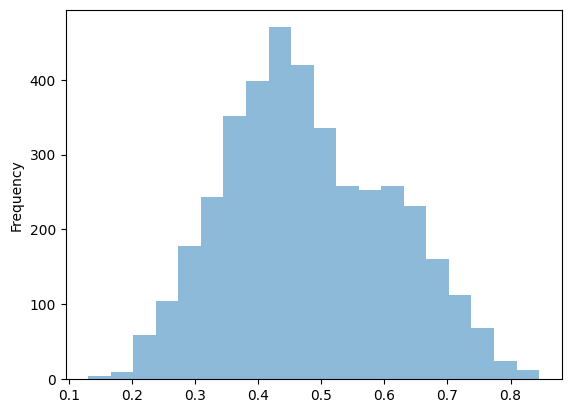

In [9]:
ax = results['target_tcp'].plot.hist(bins=20, alpha=0.5)

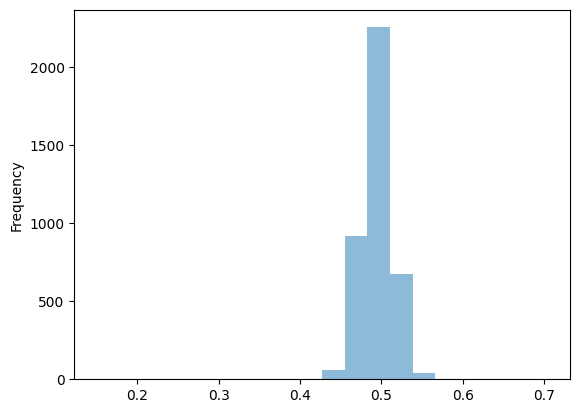

In [10]:
ax = results['tcp_TVA'].plot.hist(bins=20, alpha=0.5)

In [11]:
df = pd.DataFrame({
    'tcp_TVA': results['tcp_TVA'],
    'tcp_TA': results['tcp_TA'],
    'tcp_TV': results['tcp_TV'],
    'tcp_VA': results['tcp_VA'],
    'tcp_T': results['tcp_T'],
    'tcp_V': results['tcp_V'],
    'tcp_A': results['tcp_A']
})

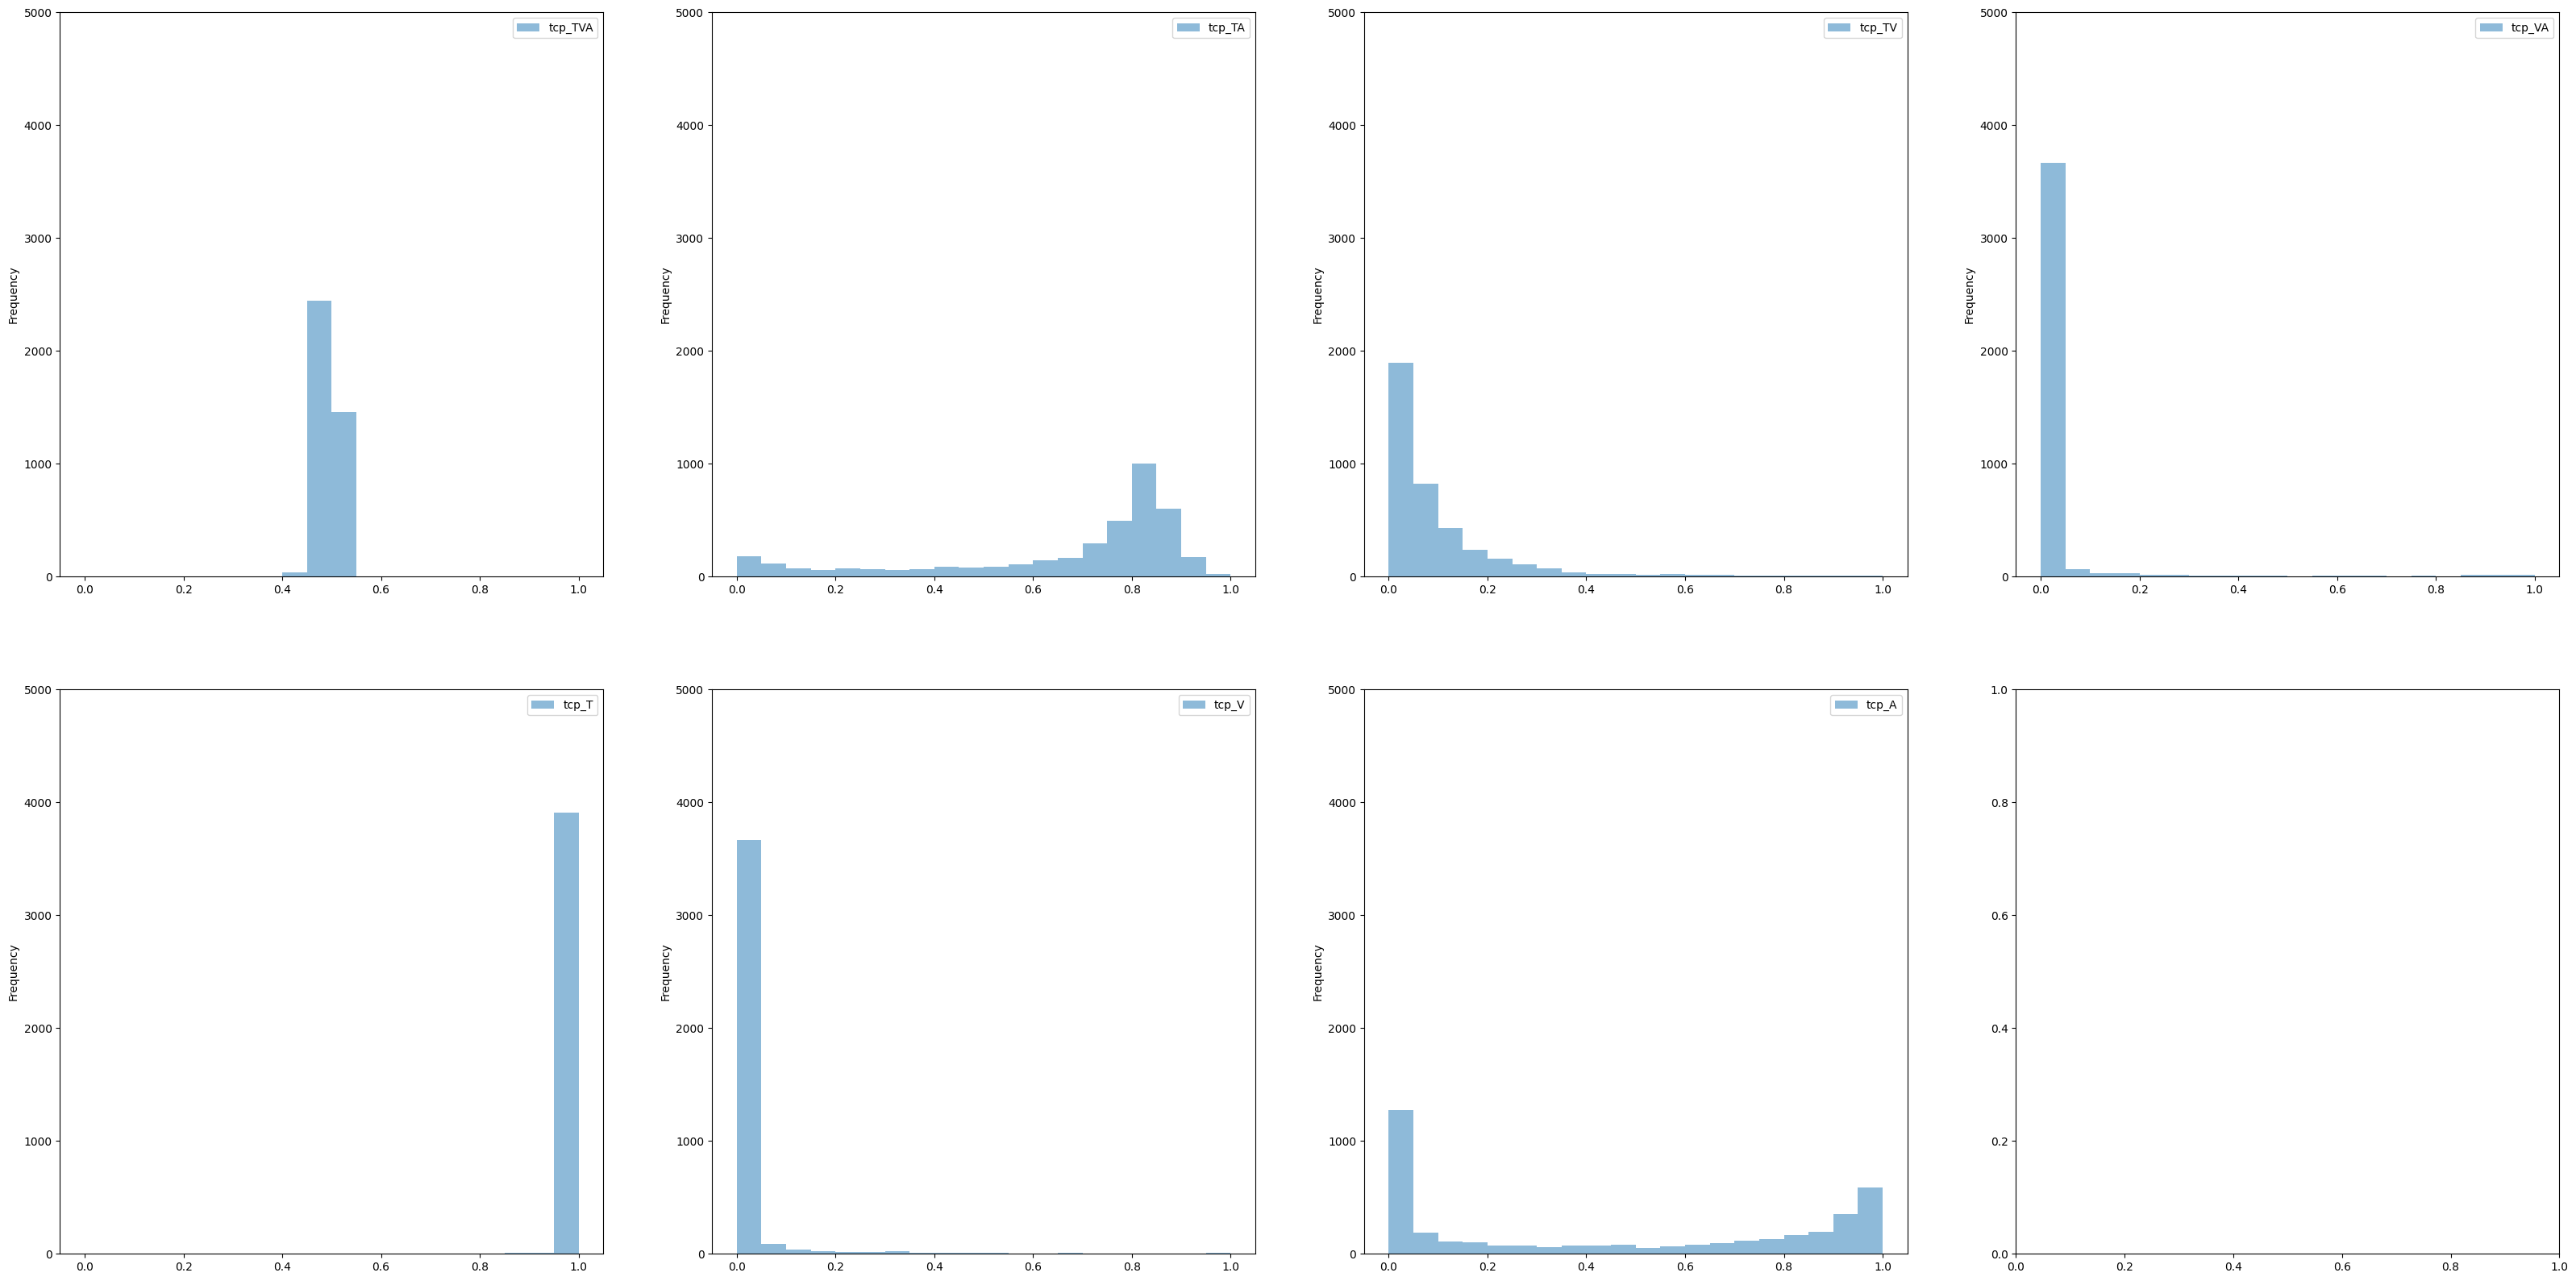

In [12]:
fig, ax = plt.subplots(2, 4, figsize=(40, 20))
m=0
for i in range(2):
    for j in range(4):
        df.plot.hist(column=df.columns[m], bins=20, ax=ax[i,j], alpha=0.5, ylim=(0, 5000))
        m+=1
        if m == 7:
            break

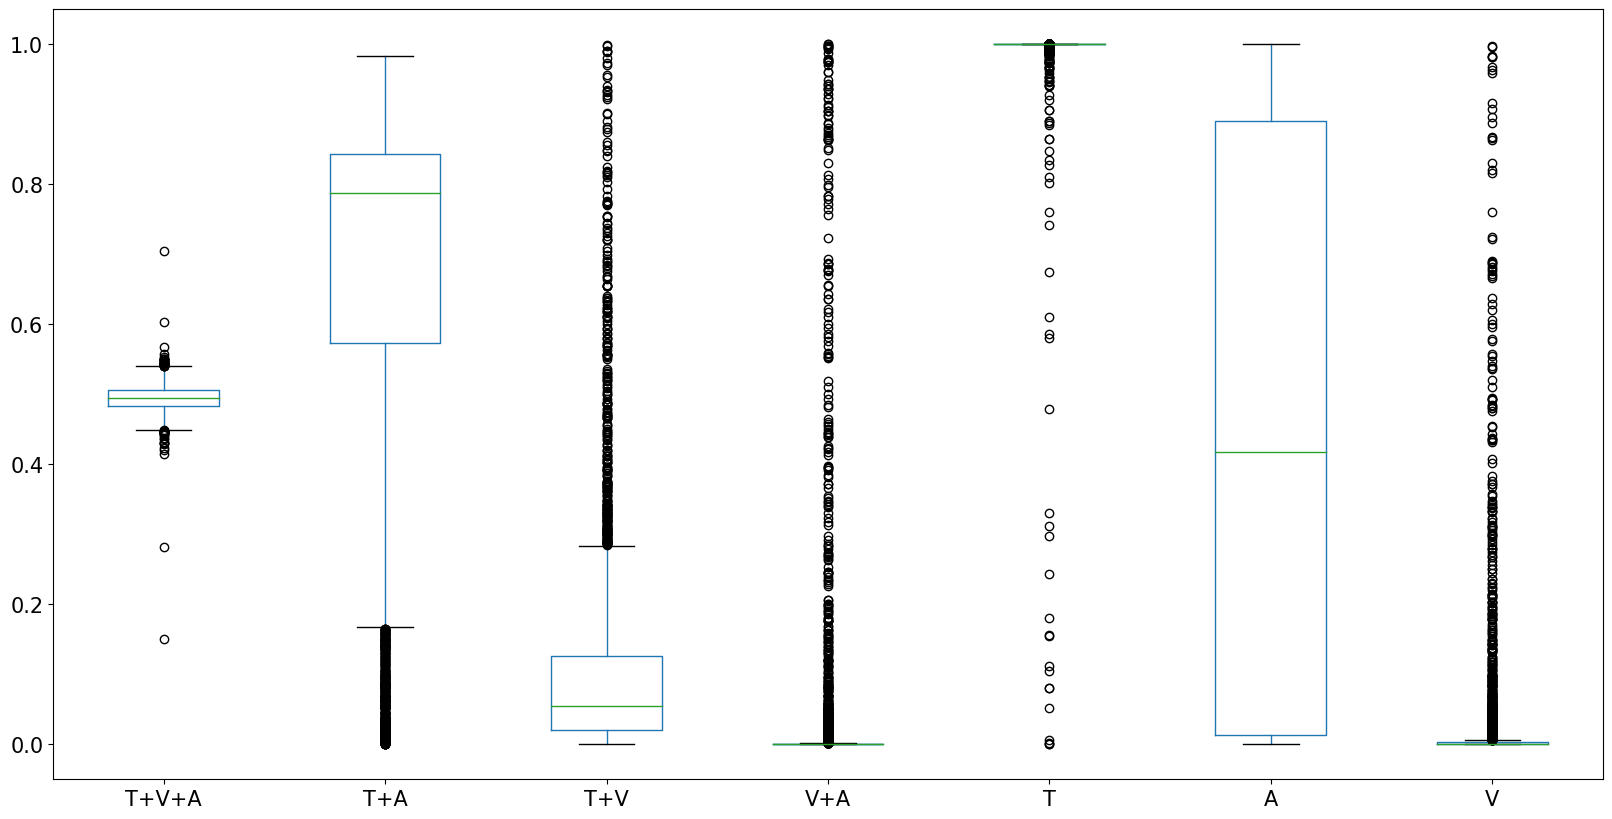

In [13]:
df = pd.DataFrame({'T+V+A': results['tcp_TVA'], 'T+A': results['tcp_TA'], 'T+V': results['tcp_TV'], 'V+A': results['tcp_VA'], 'T': results['tcp_T'], 'V': results['tcp_V'], 'A': results['tcp_A']})  
box_plot = df.boxplot(column=['T+V+A', 'T+A', 'T+V', 'V+A', 'T', 'A', 'V'], figsize=(20, 10), grid=False, fontsize=15)

Text(0, 0.5, 'Mean TCP')

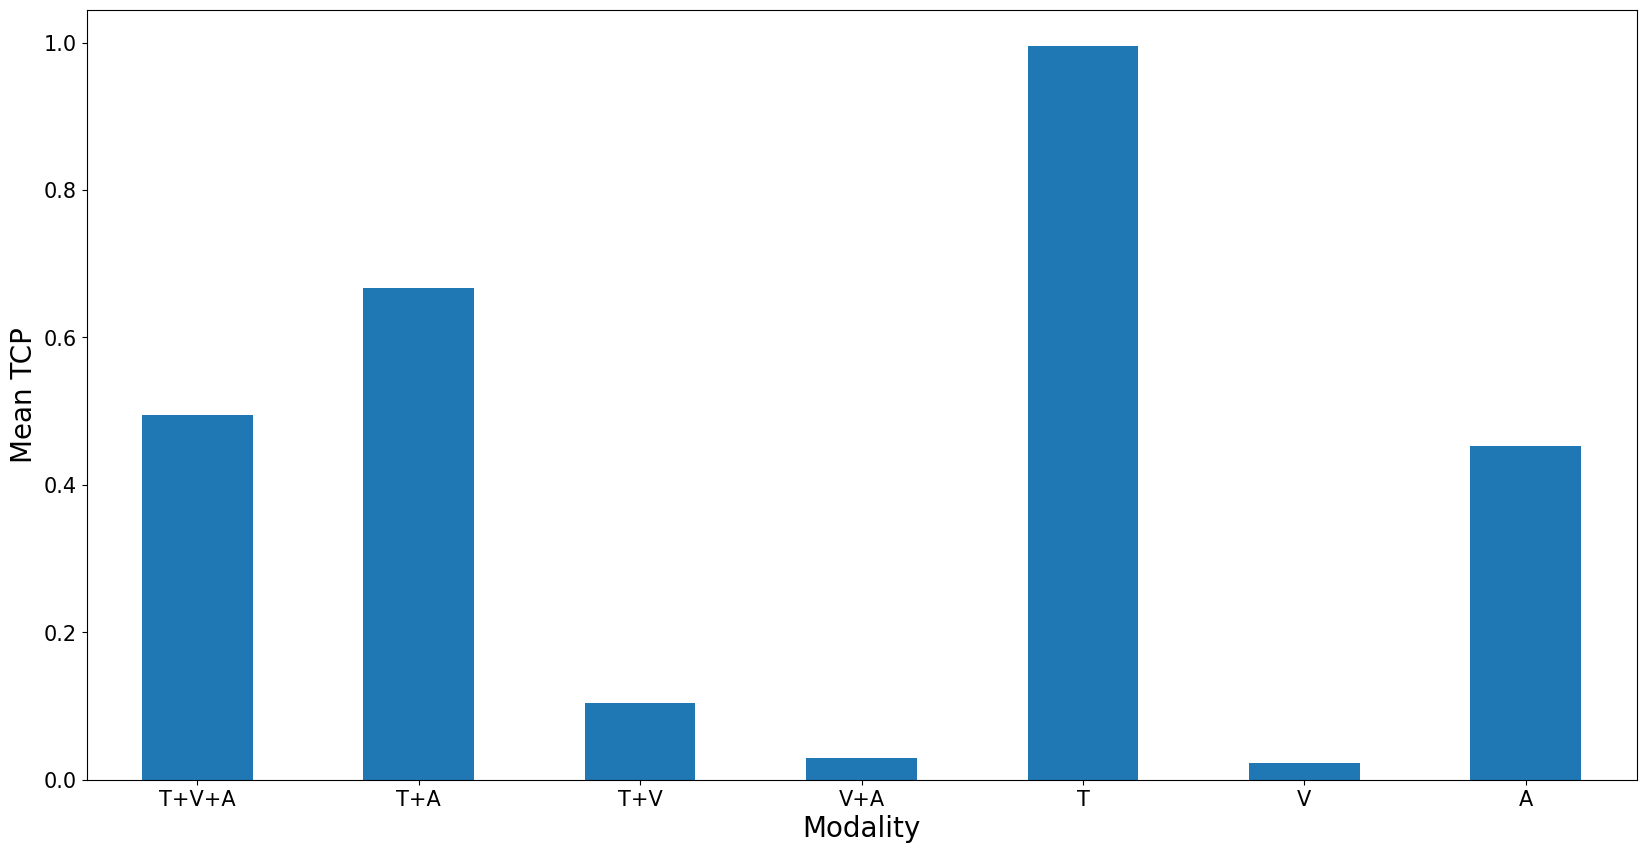

In [14]:
df = pd.Series({
    'T+V+A': np.mean(results['tcp_TVA']), 
    'T+A': np.mean(results['tcp_TA']), 
    'T+V': np.mean(results['tcp_TV']), 
    'V+A': np.mean(results['tcp_VA']), 
    'T': np.mean(results['tcp_T']),
    'V': np.mean(results['tcp_V']), 
    'A': np.mean(results['tcp_A'])
    })  
# histogram of the data
ax = df.plot.bar(figsize=(20, 10), fontsize=15, rot=0)
ax.set_xlabel("Modality", fontsize=20)
ax.set_ylabel("Mean TCP", fontsize=20)

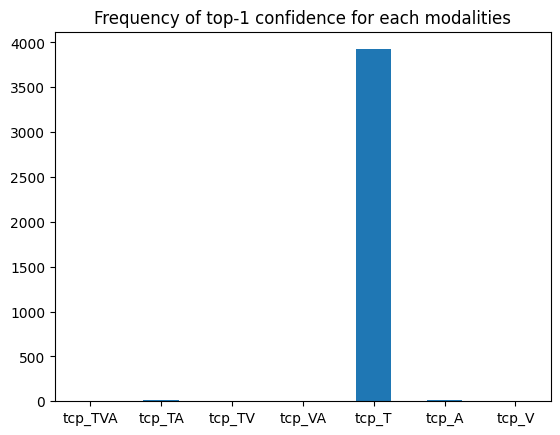

In [15]:
# Frequency of top-1 confidence for each modalities
columns = ['tcp_TVA', 'tcp_TA', 'tcp_TV', 'tcp_VA', 'tcp_T', 'tcp_A', 'tcp_V']
results['top_1_column'] = results[['tcp_TVA','tcp_TV','tcp_TA', 'tcp_VA', 'tcp_T', 'tcp_A', 'tcp_V']].idxmax(axis=1)
df = results['top_1_column'].value_counts(sort=False)
for col in columns:
    if col not in df.index:
        df[col] = 0
ax = df.loc[columns].plot.bar(rot=0, x=columns, title="Frequency of top-1 confidence for each modalities")

<Axes: title={'center': 'Frequency of top-1 confidence for each modalities'}>

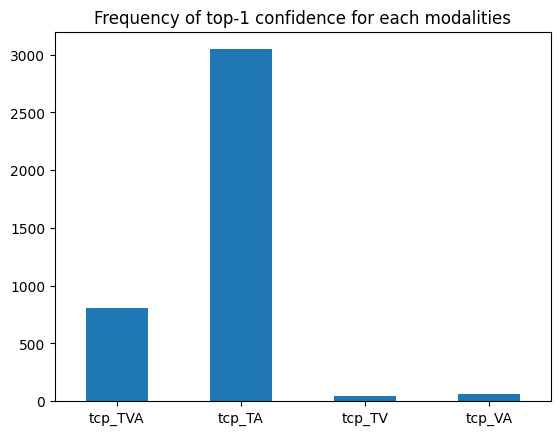

In [16]:
columns = ['tcp_TVA', 'tcp_TA', 'tcp_TV', 'tcp_VA']
results['top_1_column'] = results[['tcp_TVA','tcp_TV','tcp_TA', 'tcp_VA']].idxmax(axis=1)
df = results['top_1_column'].value_counts(sort=False)
for col in columns:
    if col not in df.index:
        df[col] = 0
df.loc[columns].plot.bar(rot=0, x=columns, title="Frequency of top-1 confidence for each modalities")